<a href="https://colab.research.google.com/github/jasonlee87/AIDL-Lab/blob/master/02_02_mnist_mlp_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# tf.keras 패키지를 이용해 MLP(Mingle Layer Perceptron) 설계하기

1. 이미지 분류(Image Classification)를 위한 뉴럴 네트워크(Neural Network)를 MLP로 설계한다.
2. NN 모델을 훈련시킨다.
3. NN 모델의 정확도를 검증한다.

## TensorFlow 2 패키지를 설치하고 관련 모듈들을 import 한다.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import matplotlib.pyplot as plt

## tf.keras.dataset의 mnist dataset을 다운받는다. 그리고 255.0으로 나눠 int를 float로 변환한다.

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (test_images, test_labels) = mnist.load_data()
x_train, test_images = x_train / 255.0, test_images / 255.0

## 실제 mnist dataset 모습 (총 60000개)

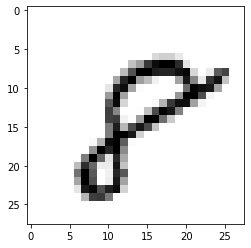

In [47]:
plt.imshow(x_train[59999], cmap='gray_r')
plt.show()

## tf.keras.Sequential 모델을 만든다.

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

## 그리고 훈련에 사용할 optimizer와 loss 함수를 선택한다.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 학습

In [50]:
history = model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2356 - accuracy: 0.9302
Epoch 2/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1087 - accuracy: 0.9673
Epoch 3/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0829 - accuracy: 0.9732
Epoch 4/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0672 - accuracy: 0.9796
Epoch 5/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0593 - accuracy: 0.9815


## 모델 구성 요약을 보는 2가지 방법

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
________________________________________________

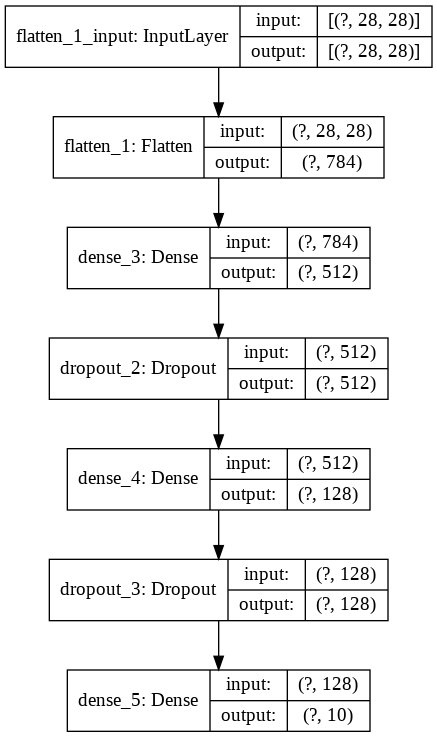

In [52]:
#tf.keras.utils.plot_model(model) 
tf.keras.utils.plot_model(model, 
                          'file_name.png',
                          show_shapes=True
                          )

## 모델 테스트

In [53]:
model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 1s - loss: 0.0357 - accuracy: 0.9801


[0.07143671840808674, 0.9801]

## MNIST 데이타셋중 테스트셋을 대상으로 한 MLP 이미지 분류기의 정확도는 97% 수준이다.

## Plot 그리기

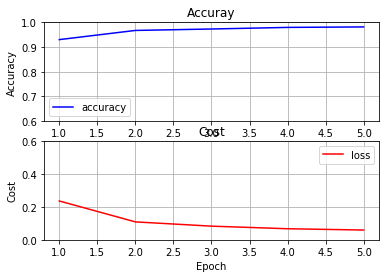

In [54]:
history_dict = history.history
history_dict.keys()

loss = history_dict['loss']
epochs = range(1, len(loss)+1)

plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='accuracy')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Cost')
plt.plot(epochs, history.history['loss'], 'r', label='loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.ylim([0.0, 0.6])
plt.legend(loc='best')
plt.show()


In [0]:
#model.save('file_name.h5')
#ld_model=tf.keras.models.load_model('path_to_model.h5')

In [0]:
#tf.saved_model.save(model, "path_to_folder_on_disk")
#loaded_model = tf.saved_model.load("path_to_folder")

In [0]:
#loaded_model = tf.saved_model.load("path_to_folder")

In [59]:
#model = create_model()

model.fit(x_train, y_train, epochs=5)

# 전체 모델을 HDF5 포맷 파일로 저장합니다.
model.save('my_model.h5')

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0501 - accuracy: 0.9844
Epoch 2/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0429 - accuracy: 0.9862
Epoch 3/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0418 - accuracy: 0.9867
Epoch 4/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0366 - accuracy: 0.9881
Epoch 5/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0358 - accuracy: 0.9886


In [0]:
#import tensorflow.keras as keras

In [61]:
# 가중치와 옵티마이저를 포함하여 정확히 동일한 모델을 다시 생성합니다
new_model = tf.keras.models.load_model('my_model.h5')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
________________________________________________

In [62]:
import time
saved_model_path = "./saved_models/{}".format(int(time.time()))

tf.keras.models.save_model(model, saved_model_path)

saved_model_path

INFO:tensorflow:Assets written to: ./saved_models/1574593250/assets


'./saved_models/1574593250'

In [63]:
!ls -al ./saved_models/1574593250

total 136
drwxr-xr-x 4 root root   4096 Nov 24 11:00 .
drwxr-xr-x 4 root root   4096 Nov 24 11:00 ..
drwxr-xr-x 2 root root   4096 Nov 24 11:00 assets
-rw-r--r-- 1 root root 121639 Nov 24 11:00 saved_model.pb
drwxr-xr-x 2 root root   4096 Nov 24 11:00 variables


In [0]:
new_model = tf.keras.models.load_model(saved_model_path)
new_model.summary()

In [0]:
pred = model.predict(test_images)
predictions_check = tf.equal(tf.argmax(pred, 1), test_labels)
accuracy = tf.reduce_mean(tf.cast(predictions_check, tf.float32))
print ("Accuracy : {:5.2f}%".format(100*accuracy))

In [0]:
# 복원된 옵티마이저를 사용합니다.
new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)